In [1]:
!pip install plotly
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
dataset = pd.read_csv('TSLA.csv')


In [4]:
dataset.shape

(762, 7)

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
1,2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2,2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
3,2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
4,2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500


In [6]:
final_TSLA=dataset [['Close']]

In [7]:
final_TSLA.head()

,Close
0,62.023998
1,60.071999
2,63.537998
3,66.991997
4,67.070000


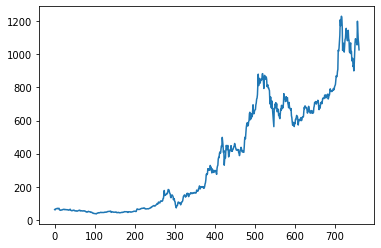

In [8]:
final_TSLA['Close'].plot()

In [22]:
# fix random seed for reproducibility
np.random.seed(7)


In [23]:
dataset1 = final_TSLA.values
dataset1 = final_TSLA.astype('float32')


In [24]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
TSLA_dataset= scaler.fit_transform(dataset1)



In [25]:
# split into train and test sets
train_size = int(len(TSLA_dataset) * 0.7)
test_size = len(TSLA_dataset) - train_size
train, test = TSLA_dataset[0:train_size,:], TSLA_dataset[train_size:len(TSLA_dataset),:]
print(len(train), len(test))



533 229


In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset1[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [27]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [28]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [29]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)



Epoch 1/100
531/531 - 2s - loss: 0.0208 - 2s/epoch - 4ms/step
Epoch 2/100
531/531 - 1s - loss: 0.0066 - 698ms/epoch - 1ms/step
Epoch 3/100
531/531 - 1s - loss: 7.4777e-04 - 705ms/epoch - 1ms/step
Epoch 4/100
531/531 - 1s - loss: 1.6898e-04 - 681ms/epoch - 1ms/step
Epoch 5/100
531/531 - 1s - loss: 1.6370e-04 - 713ms/epoch - 1ms/step
Epoch 6/100
531/531 - 1s - loss: 1.5733e-04 - 709ms/epoch - 1ms/step
Epoch 7/100
531/531 - 1s - loss: 1.5108e-04 - 694ms/epoch - 1ms/step
Epoch 8/100
531/531 - 1s - loss: 1.5265e-04 - 726ms/epoch - 1ms/step
Epoch 9/100
531/531 - 1s - loss: 1.5037e-04 - 709ms/epoch - 1ms/step
Epoch 10/100
531/531 - 1s - loss: 1.4570e-04 - 728ms/epoch - 1ms/step
Epoch 11/100
531/531 - 1s - loss: 1.4299e-04 - 671ms/epoch - 1ms/step
Epoch 12/100
531/531 - 1s - loss: 1.4186e-04 - 692ms/epoch - 1ms/step
Epoch 13/100
531/531 - 1s - loss: 1.4701e-04 - 706ms/epoch - 1ms/step
Epoch 14/100
531/531 - 1s - loss: 1.3479e-04 - 696ms/epoch - 1ms/step
Epoch 15/100
531/531 - 1s - loss: 1.4242

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 13.08 RMSE
Test Score: 35.22 RMSE


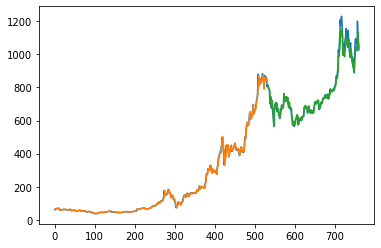

In [31]:
# shift train predictions for plotting
trainPredictPlot= np.empty_like(TSLA_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(TSLA_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(TSLA_dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(TSLA_dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
